# Extract Text from PDF

In [6]:
!pip install pymupdf

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.1/24.1 MB 51.4 MB/s eta 0:00:0000:0100:01m


In [7]:
# Step 2: Import and Load Budget Text
import fitz  # PyMuPDF
import spacy
from collections import Counter
import matplotlib.pyplot as plt

# Load the PDF
text = ""
with fitz.open("/kaggle/input/pakistan-federal-budget-2025/Pakistan Federal Budget 2025.pdf") as pdf:
    for page in pdf:
        text += page.get_text()

# Extract specific snippet
budget_snippet = text[19400:20900]
print("Text Sample:\n", budget_snippet[:500])



Text Sample:
 Contd…..
Deposits and Reserves (Receipts)
(Rs in million)
G
Deposits and Reserves represent all monies forming part of the Public Account of the
Federation as per Article 78(2) of the Constitution of Islamic Republic of Pakistan. Budget
estimates of receipts in the following table are however subject to fulfillment of following
stipulations:-
(i) The funds appropriated by the National Assembly out of Federal Consolidated Funds in terms
of Articles 80 to 84 of the Constitution for a particular fi


# POS Tagging using spacy

In [8]:
# Step 4: Initialize spaCy model and preprocess
nlp = spacy.load("en_core_web_sm")
doc = nlp(budget_snippet)

# Preprocess: remove stopwords, punctuation, spaces
clean_tokens = [
    token for token in doc
    if not token.is_stop and not token.is_punct and not token.is_space
]

# Optional: clean up whitespace in string (optional, not required before NLP)
clean_text = " ".join([token.text for token in clean_tokens])


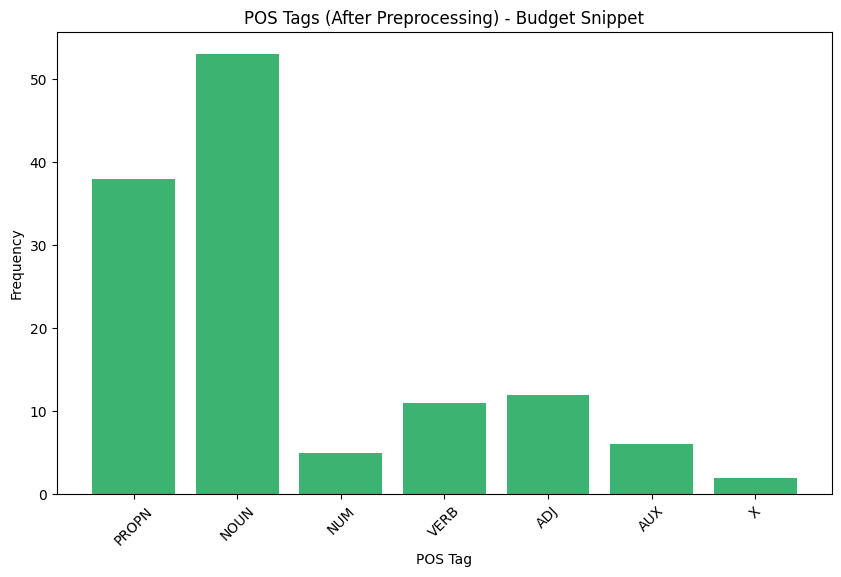

In [9]:
# Step 5: Apply POS tagging on preprocessed tokens
pos_counts = Counter([token.pos_ for token in clean_tokens])

# Plot the POS tag distribution
plt.figure(figsize=(10, 6))
plt.bar(pos_counts.keys(), pos_counts.values(), color='mediumseagreen')
plt.title("POS Tags (After Preprocessing) - Budget Snippet")
plt.xlabel("POS Tag")
plt.ylabel("Frequency")
plt.xticks(rotation=45)
plt.show()

# info for each token

In [10]:
# Step 6: Print detailed info for each token
for token in clean_tokens:
    print(
        token.text + " ====> " +
        token.pos_ + ", " +
        token.tag_ + " --> " + str(spacy.explain(token.tag_)) +
        " | Dependency ==> " + token.dep_
    )


Contd ====> PROPN, NNP --> noun, proper singular | Dependency ==> nmod
Deposits ====> NOUN, NNS --> noun, plural | Dependency ==> nsubj
Reserves ====> PROPN, NNPS --> noun, proper plural | Dependency ==> conj
Receipts ====> PROPN, NNPS --> noun, proper plural | Dependency ==> appos
Rs ====> NOUN, NNS --> noun, plural | Dependency ==> appos
million ====> NUM, CD --> cardinal number | Dependency ==> pobj
G ====> PROPN, NNP --> noun, proper singular | Dependency ==> compound
Deposits ====> NOUN, NNS --> noun, plural | Dependency ==> conj
Reserves ====> PROPN, NNPS --> noun, proper plural | Dependency ==> conj
represent ====> VERB, VBP --> verb, non-3rd person singular present | Dependency ==> ROOT
monies ====> NOUN, NNS --> noun, plural | Dependency ==> dobj
forming ====> VERB, VBG --> verb, gerund or present participle | Dependency ==> acl
Public ====> PROPN, NNP --> noun, proper singular | Dependency ==> compound
Account ====> PROPN, NNP --> noun, proper singular | Dependency ==> pobj
F